In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.append('/content/gdrive/My Drive/carrello')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import fra_libNuovo as fra
import my_lib_santanastasio as my

# Fit di calibrazione 1

Array posizioni

In [ ]:
#l = np.array([0.50,0.60,0.70,0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50])

Array medie tempi e incertezze

In [ ]:
#medie = np.zeros((11))
#udT = np.zeros((11))
#for i in range(11):
  #a, medie[i], udT[i] = fra.import_data("/content/gdrive/My Drive/carrello/calibrazione {0}0.txt".format(i+5))

In [ ]:
#plt.plot(medie,l,'bo-')
#plt.grid()

In [ ]:
#incertezza sulle misure di lunghezza l'abbiamo posta pari a due millimetri
#ul=np.repeat(0.0007,len(l))

In [ ]:
#m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(medie, l, ul, "$\Delta$T [s]", "l [m]",plot=True, setrange=False)

In [ ]:
#ul_new = np.sqrt(ul**2+(m0*udT)**2)
#m, sm, c, sc, cov, rho = my.lin_fit(medie, l, ul_new, "$\Delta$T [s]", "l [m]",plot=True, setrange=False)

In [ ]:
#l_atteso = m*medie + c
#d = l - l_atteso
#d_norm = d / ul_new

#plt.errorbar(medie,d,ul_new,marker='.',linestyle="")
#plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
#plt.xlabel("$x$ [ux]")
#plt.grid()

In [ ]:
#plt.errorbar(medie,d_norm,ul_new/ul_new,marker='.',linestyle="")
#plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
#plt.xlabel("$x$ [ux]")
#plt.grid()

# Fit di calibrazione 2 (definitivo)

Nuovi array

In [14]:
l = np.array([0.50,0.60,0.70,0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50])

Prova = [4.64314508e-06 9.14961028e-07 1.37784503e-06 9.42786716e-07
 9.43632547e-07 1.15980835e-06 1.75300521e-06 1.10553697e-06
 1.01224829e-05 1.77498988e-06 1.81592784e-06]
media = 2.414011046705387e-06


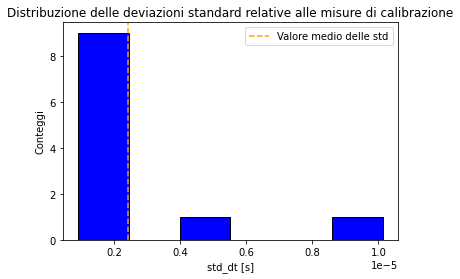

In [15]:
medie = np.zeros((11))
udT = np.zeros((11))
prova = np.zeros((11))
sum=0
for i in range(11):
  a, medie[i], udT[i] = fra.import_data("/content/gdrive/My Drive/carrello/calibrazione {0}0new.txt".format(i+5))
  prova[i] = np.std(a, ddof=1)
  sum+=np.std(a, ddof=1)


#std_mean è la media delle deviazioni standard degli array DeltaT
std_mean = sum/11

#Prova grafico deviazioni standard
binsize = np.std(prova,ddof=1)/2
interval = prova.max() - prova.min()
nbins = int(interval / binsize)
nbins

counts , bins , patches = plt.hist(prova,bins=nbins,color="blue",edgecolor='black' )
plt.xlabel('std_dt [s]')
plt.ylabel('Conteggi')
plt.axvline(x=std_mean,color='orange',linestyle='--',label = 'Valore medio delle std')
plt.title(label='Distribuzione delle deviazioni standard relative alle misure di calibrazione')
plt.legend()

print('Prova = {0}\nmedia = {1}'.format(prova,std_mean))

In [16]:
#incertezza sulle misure di lunghezza, calcolata come riportato sulla relazione
ul=np.repeat(0.0006454972244,len(l))

m         =  173.3816
sigma(m)  =  0.1067
c         =  -0.0169
sigma(c)  =  0.0007
cov(m, c) =  -0.0001
rho(m, c) =  -0.9549


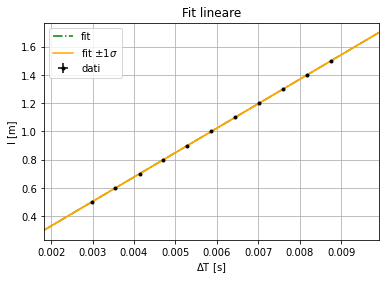

In [17]:
m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(medie, l, ul, "$\Delta$T [s]", "l [m]",plot=True, setrange=False)

m         =  173.3797
sigma(m)  =  0.1073
c         =  -0.0169
sigma(c)  =  0.0007
cov(m, c) =  -0.0001
rho(m, c) =  -0.9549


array([7.54826310e-05, 5.12568422e-05, 5.27332866e-05, 5.13303745e-05,
       5.13450496e-05, 5.20123318e-05, 5.43666096e-05, 5.17773559e-05,
       1.31853486e-04, 5.43115982e-05, 5.46258787e-05])

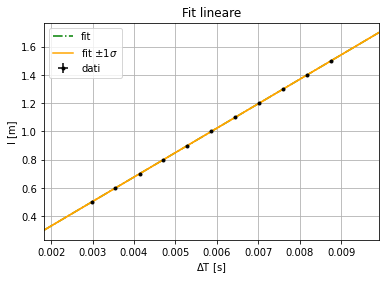

In [18]:
ul_new = np.sqrt(ul**2+(m0*udT)**2)
m, sm, c, sc, cov, rho = my.lin_fit(medie, l, ul_new, "$\Delta$T [s]", "l [m]",plot=True, setrange=False)
m0*udT

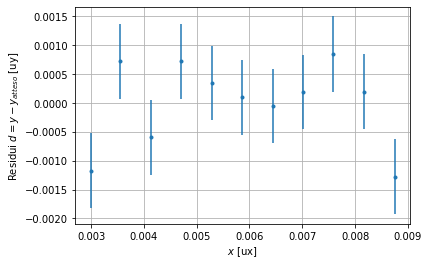

In [19]:
l_atteso = m*medie + c
d = l - l_atteso
d_norm = d / ul_new

plt.errorbar(medie,d,ul_new,marker='.',linestyle="")
plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
plt.xlabel("$x$ [ux]")
plt.grid()

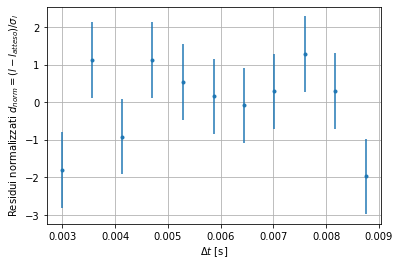

In [20]:
plt.errorbar(medie,d_norm,ul_new/ul_new,marker='.',linestyle="")
plt.ylabel("Residui normalizzati $d_{norm} = (l - l_{atteso})/\sigma_l$")
plt.xlabel("$\Delta t$ [s]")
plt.grid()

In [21]:
# Estraggo la velocità del suono
Vs = 2*m
uVs = 2*sm 
print('Vs={0}\nuVs={1}'.format(Vs,uVs))

Vs=346.7593874669808
uVs=0.21460210500092097


In [22]:
# Confronto con il valore assunto vero a 25 C, cioè 346.3 ms^-1
Z = (346.3 - Vs)/uVs
Z

-2.140647534556171

# Calibrazione 3 mischiando i dati


In [ ]:
#l3=np.array([0.50,0.60,0.70,0.80,0.90,1.00,1.10,1.20,1.30,1.40,1.50])
#ul3= np.repeat(np.sqrt( np.power(0.001/np.sqrt(12),2)+np.power(0.002/np.sqrt(12),2)),len(l3))

Utilizzo i dati della calibrazione 1, che sembrano migliori, sostituendo quei 3 punti che vengono male con i dati della seconda calibrazione

In [ ]:
#medie3 = np.zeros((11))
#udT3 = np.zeros((11))

#for i in range (11):
  #if(i!=0 and i!=7 and i!=8):
    #a3, medie3[i], udT3[i] = fra.import_data("/content/gdrive/My Drive/carrello/calibrazione {0}0.txt".format(i+5))
  #else:
    #a3, medie3[i], udT3[i] = fra.import_data("/content/gdrive/My Drive/carrello/calibrazione {0}0new.txt".format(i+5))

#print(medie3,udT3)


In [ ]:
#Faccio il fit
#m03, sm03, c03, sc03, cov03, rho03 = my.lin_fit(medie3, l3, ul3, "$\Delta$T [s]", "l [m]", 0, 0.01, 0.40, 1.60, plot=True, setrange=True)

In [ ]:
# nuove y
#ul3_new = np.sqrt(ul3**2+(m03*udT3)**2)
#m3, sm3, c3, sc3, cov3, rho3 = my.lin_fit(medie3, l3, ul3_new, "$\Delta$T [s]", "l [m]", 0, 0.01, 0.40, 1.60, plot=True, setrange=True)

In [ ]:
# Studio dei residui
#l3_atteso = m3*medie3 + c3
#d3 = l3 - l3_atteso
#d_norm3 = d3 / ul3_new

In [ ]:
#plt.errorbar(medie3,d_norm3,ul3_new/ul3_new,marker='.',linestyle="")
#plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
#plt.xlabel("$x$ [ux]")
#plt.grid()

# Posizioni

Array tempi

In [25]:
#dT01 = fra.import_data("/content/gdrive/My Drive/carrello/discesa0.1Nuovo.txt".format(i+5))[0]
t01,dT01 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa0.1Nuovo.txt")

In [26]:
#dT11 = fra.import_data("/content/gdrive/My Drive/carrello/discesa1.1.txt".format(i+5))[0]
t11,dT11 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa1.1.txt")

In [27]:
#dT21 = fra.import_data("/content/gdrive/My Drive/carrello/discesa2.1.txt".format(i+5))[0]
t21,dT21 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa2.1.txt")

In [28]:
#dT31 = fra.import_data("/content/gdrive/My Drive/carrello/discesa3.1.txt".format(i+5))[0]
t31,dT31 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa3.1.txt")

In [29]:
#dT41 = fra.import_data("/content/gdrive/My Drive/carrello/discesa4.1.txt".format(i+5))[0]
t41,dT41 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa4.1.txt")

Conversione da tempi a posizione

In [30]:
#uT01=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT01)) 
#x01, ux01 = fra.y_estrapolato2(dT01, m, c, uT01, sm, sc, cov)

udT01=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT01)) 
x01, ux01 = fra.y_estrapolato2(dT01, m, c, udT01, sm, sc, cov)

In [31]:
d#ho aggiunto l'incertezza di tipo A sulle misure di delta T come media delle deviazioni sdt ottenute sopra (Fra)
#uT11=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT11)) 
#x11, ux11 = fra.y_estrapolato2(dT11, m, c, uT11, sm, sc, cov)

udT11=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT11)) 
x11, ux11 = fra.y_estrapolato2(dT11, m, c, udT11, sm, sc, cov)

In [32]:
#uT21=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT21)) 
#x21, ux21 = fra.y_estrapolato2(dT21, m, c, uT21, sm, sc, cov)

udT21=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT21)) 
x21, ux21 = fra.y_estrapolato2(dT21, m, c, udT21, sm, sc, cov)

In [33]:
#uT31=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT31)) 
#x31, ux31 = fra.y_estrapolato2(dT31, m, c, uT31, sm, sc, cov)

udT31=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT31)) 
x31, ux31 = fra.y_estrapolato2(dT31, m, c, udT31, sm, sc, cov)

In [34]:
#uT41=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT41)) 
#x41, ux41 = fra.y_estrapolato2(dT41, m, c, uT41, sm, sc, cov)

udT41=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT41)) 
x41, ux41 = fra.y_estrapolato2(dT41, m, c, udT41, sm, sc, cov)

## Grafico x(t)

Text(0, 0.5, 'x[m]')

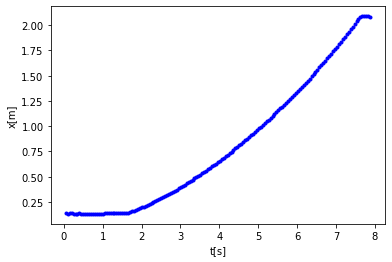

In [35]:
#fra.t_plot(x01, 'x[m]', 'x(t)')
plt.plot(t01,x01,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')

Text(0, 0.5, 'x[m]')

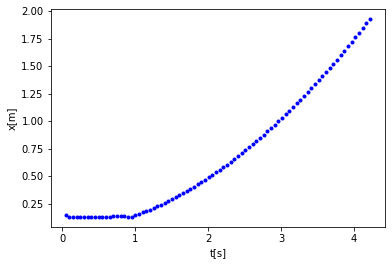

In [36]:
#fra.t_plot(x11, 'x[m]', 'x(t)')
plt.plot(t11,x11,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')

Text(0, 0.5, 'x[m]')

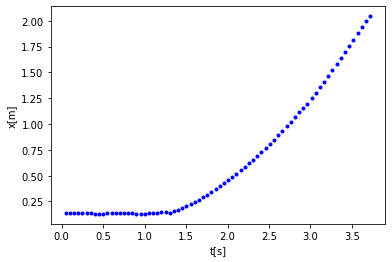

In [37]:
#fra.t_plot(x21, 'x[m]', 'x(t)')
plt.plot(t21,x21,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')

Text(0, 0.5, 'x[m]')

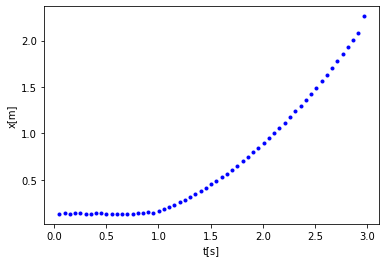

In [38]:
#fra.t_plot(x31, 'x[m]', 'x(t)')
plt.plot(t31,x31,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')

Text(0, 0.5, 'x[m]')

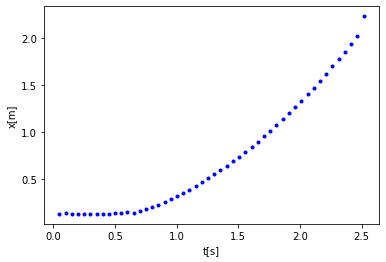

In [39]:
#fra.t_plot(x41, 'x[m]', 'x(t)')
plt.plot(t41,x41,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')

# Velocità e fit (vedere bene i tagli)

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


<ErrorbarContainer object of 3 artists>

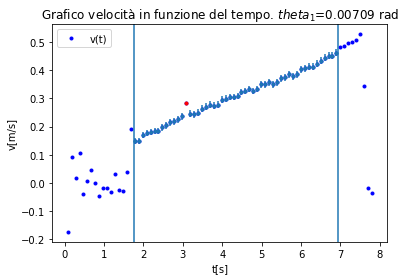

In [58]:
#v01, uv01=fra.velocità(x01, m, sm, uT01, dT01)
#fra.t_plot2(v01, 'v[m/s]', 'v(t)')

v01,uv01=fra.velocita(x01, m, sm, udT01, dT01)
t_nuovo01 = fra.modifica_tempi(t01)
plt.title('Grafico velocità in funzione del tempo. $theta_1$=0.00709 rad')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]') 
plt.plot(t_nuovo01,v01,'b.', label="v(t)")
plt.legend()

plt.axvline(x=1.75, ymin=-0.3, ymax=2)
plt.axvline(x=6.95, ymin=-0.3, ymax=2)

v01, uv01, t_nuovo01 = fra.dfCut (v01, uv01, t_nuovo01, 1.75, 6.9)
plt.plot(t_nuovo01[13],v01[13], '.r')
v01 = np.delete(v01,13)
uv01 = np.delete(uv01,13)
t_nuovo01 = np.delete(t_nuovo01,13)
plt.errorbar(t_nuovo01,v01,uv01,marker='.',linestyle="")

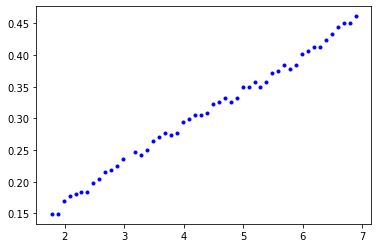

In [41]:
plt.plot(t_nuovo01,v01,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


<ErrorbarContainer object of 3 artists>

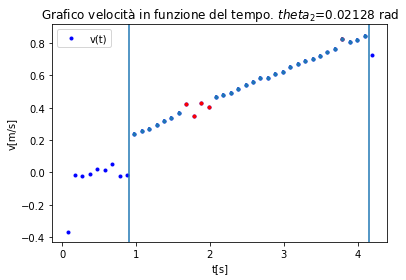

In [70]:
#v11, uv11=fra.velocità(x11, m, sm, uT11, dT11)
#fra.t_plot2(v11, 'v[m/s]', 'v(t)')

v11,uv11=fra.velocita(x11, m, sm, udT11, dT11)
t_nuovo11 = fra.modifica_tempi(t11)
plt.plot(t_nuovo11,v11,'b.', label="v(t)")

plt.title('Grafico velocità in funzione del tempo. $theta_2$=0.02128 rad')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.legend()


plt.axvline(x=0.9, ymin=-0.5, ymax=2)
#plt.axvline(x=1.65, ymin=-0.5, ymax=2)

#plt.axvline(x=2.05, ymin=-0.5, ymax=2)
plt.axvline(x=4.15, ymin=-0.5, ymax=2)

plt.plot(t_nuovo11[16],v11[16], '.r')
plt.plot(t_nuovo11[17],v11[17], '.r')
plt.plot(t_nuovo11[18],v11[18], '.r')
plt.plot(t_nuovo11[19],v11[19], '.r')



v11, uv11, t_nuovo11 = fra.dfCut (v11, uv11, t_nuovo11, 0.9, 4.15)
v11, uv11, t_nuovo11 = fra.dfCut (v11, uv11, t_nuovo11, 1.65, 2.05, out=False)
plt.plot(t_nuovo11[24],v11[24], '.r')
plt.errorbar(t_nuovo11,v11,uv11,marker='.',linestyle="")

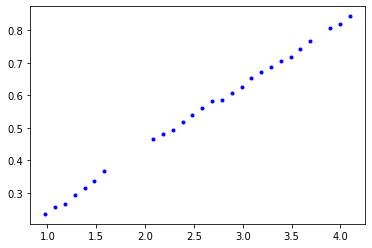

In [43]:
v11 = np.delete(v11,24)
t_nuovo11 = np.delete(t_nuovo11,24)
uv11 = np.delete(uv11,24)
plt.plot(t_nuovo11,v11,'b.')

In [44]:
#taglio gli intervalli

#v11, uv11 =fra.dfCut(v11, uv11, 0.2, 0.85)
#fra.t_plot(v11, 'v[m/s]', 'v(t)')
#index1 = [7,8,9,10,28,32]
#v11Nuovo=np.delete(v11,index1)
#uv11Nuovo=np.delete(uv11,index1)
#fra.t_plot(v11Nuovo, 'v[m/s]', 'v(t)')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


<ErrorbarContainer object of 3 artists>

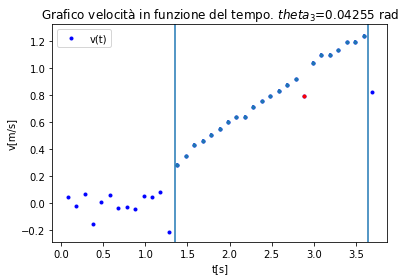

In [77]:
#v21, uv21=fra.velocità(x21, m, sm, uT21, dT21)
#fra.t_plot2(v21, 'v[m/s]', 'v(t)')

v21,uv21=fra.velocita(x21, m, sm, udT21, dT21)
t_nuovo21 = fra.modifica_tempi(t21)
plt.plot(t_nuovo21,v21,'b.', label="v(t)")
plt.title('Grafico velocità in funzione del tempo. $theta_3$=0.04255 rad')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')  
plt.legend()

plt.axvline(x=1.35, ymin=-0.5, ymax=2)
plt.axvline(x=3.65, ymin=-0.5, ymax=2)

v21, uv21, t_nuovo21 = fra.dfCut (v21, uv21, t_nuovo21, 1.35, 3.65)
plt.plot(t_nuovo21[15],v21[15], '.r')
v21 = np.delete(v21,15)
t_nuovo21 = np.delete(t_nuovo21,15)
uv21 = np.delete(uv21,15)

plt.errorbar(t_nuovo21,v21,uv21,marker='.',linestyle="")

In [46]:
#fra.t_plot2(v21, 'v[m/s]', 'v(t)')

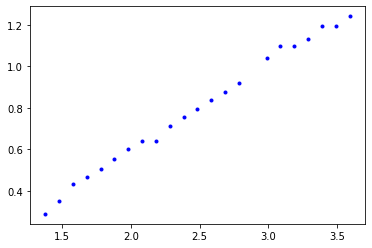

In [47]:
#taglio gli intervalli

#v21, uv21 =fra.dfCut(v21, uv21, 0.2, 0.78)
#fra.t_plot(v21, 'v[m/s]', 'v(t)')



plt.plot(t_nuovo21,v21,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


<ErrorbarContainer object of 3 artists>

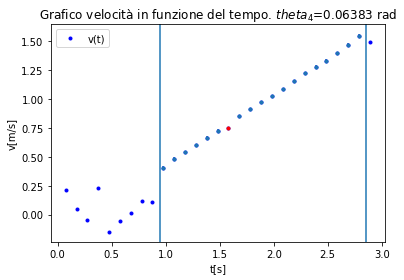

In [78]:
#v31, uv31=fra.velocità(x31, m, sm, uT31, dT31)
#fra.t_plot2(v31, 'v[m/s]', 'v(t)')

v31,uv31=fra.velocita(x31, m, sm, udT31, dT31)
t_nuovo31 = fra.modifica_tempi(t31)
plt.plot(t_nuovo31,v31,'b.', label='v(t)')
plt.title('Grafico velocità in funzione del tempo. $theta_4$=0.06383 rad')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')  
plt.legend()

plt.axvline(x=0.95, ymin=-0.5, ymax=2)
plt.axvline(x=2.85, ymin=-0.5, ymax=2)

v31, uv31, t_nuovo31 = fra.dfCut (v31, uv31, t_nuovo31, 0.95, 2.85)
plt.plot(t_nuovo31[6],v31[6], '.r')
v31 = np.delete(v31,6)
t_nuovo31 = np.delete(t_nuovo31,6)
uv31 = np.delete(uv31,6)
plt.errorbar(t_nuovo31,v31,uv31,marker='.',linestyle="")

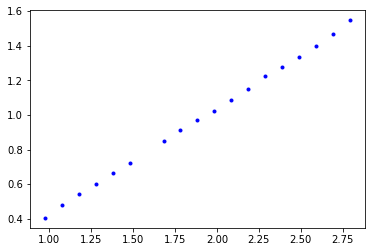

In [49]:
#taglio gli intervalli

#v31, uv31 =fra.dfCut(v31, uv31, 0.3, 1.47)
#v31=np.delete(v31, 5)
#uv31=np.delete(uv31, 5)
#fra.t_plot(v31, 'v[m/s]', 'v(t)')


plt.plot(t_nuovo31,v31,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


<ErrorbarContainer object of 3 artists>

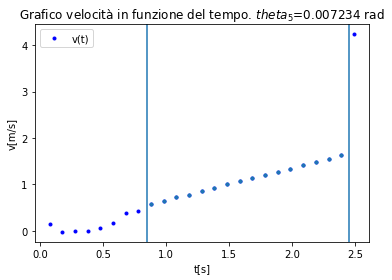

In [79]:
#v41, uv41=fra.velocità(x41, m, sm, uT41, dT41)
#fra.t_plot2(v41, 'v[m/s]', 'v(t)')

v41,uv41=fra.velocita(x41, m, sm, udT41, dT41)
t_nuovo41 = fra.modifica_tempi(t41)
plt.plot(t_nuovo41,v41,'b.', label='v(t)')
plt.title('Grafico velocità in funzione del tempo. $theta_5$=0.007234 rad')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')  
plt.legend()

plt.axvline(x=0.85, ymin=-0.5, ymax=2)
plt.axvline(x=2.45, ymin=-0.5, ymax=2)
v41, uv41, t_nuovo41 = fra.dfCut (v41, uv41, t_nuovo41, 0.6, 2.45)
v41 = np.delete(v41,[0,1])
t_nuovo41 = np.delete(t_nuovo41,[0,1])
uv41 = np.delete(uv41,[0,1])

plt.errorbar(t_nuovo41,v41,uv41,marker='.',linestyle="")

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


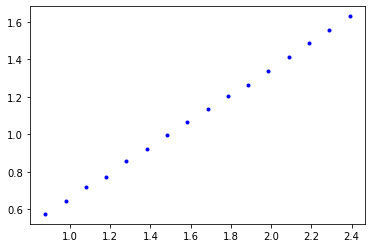

In [51]:
#taglio gli intervalli

#v41, uv41 =fra.dfCut(v41, uv41, 0.5, 2)
#fra.t_plot(v41, 'v[m/s]', 'v(t)')

plt.plot(t_nuovo41,v41,'b.')

##Fit sulle velocità

m         =  0.058
sigma(m)  =  0.0011
c         =  0.0549
sigma(c)  =  0.0051
cov(m, c) =  -0.0
rho(m, c) =  -0.9449


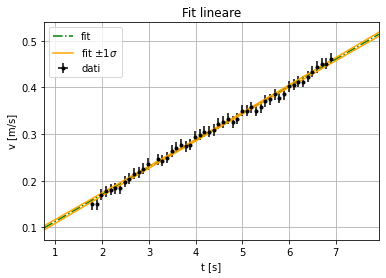

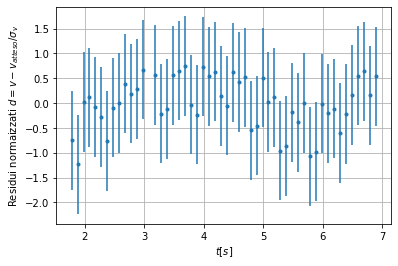

In [52]:
m01, sm01, c01, sc01, cov01, rho01 = fra.lin_fit(t_nuovo01, v01, uv01, xlabel="t [s]", ylabel="v [m/s]", ylabel1="v", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.1936
sigma(m)  =  0.0024
c         =  0.0515
sigma(c)  =  0.0067
cov(m, c) =  -0.0
rho(m, c) =  -0.9401


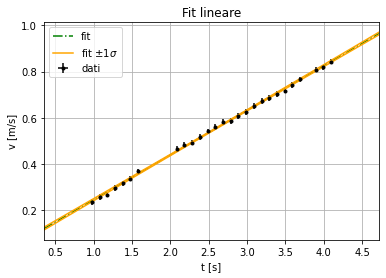

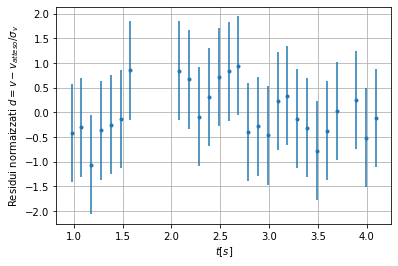

In [53]:

m11, sm11, c11, sc11, cov11, rho11 = fra.lin_fit(t_nuovo11, v11, uv11, xlabel="t [s]", ylabel="v [m/s]", ylabel1="v", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.4253
sigma(m)  =  0.0038
c         =  -0.2593
sigma(c)  =  0.0096
cov(m, c) =  -0.0
rho(m, c) =  -0.9643


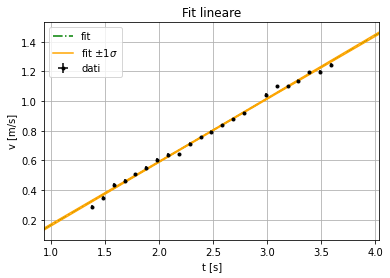

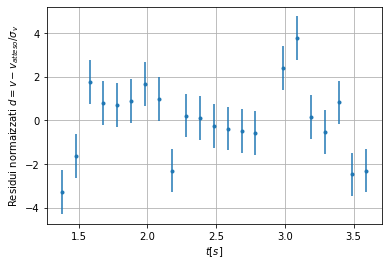

In [54]:

m21, sm21, c21, sc21, cov21, rho21 = fra.lin_fit(t_nuovo21, v21, uv21, xlabel="t [s]", ylabel="v [m/s]", ylabel1="v", uy_label="m/s", verbose=True, plot=True, residui=True)



0.020803250118274694
m         =  0.4253
sigma(m)  =  0.0066
c         =  -0.2592
sigma(c)  =  0.0168
cov(m, c) =  -0.0001
rho(m, c) =  -0.9643


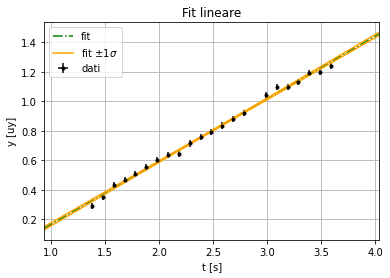

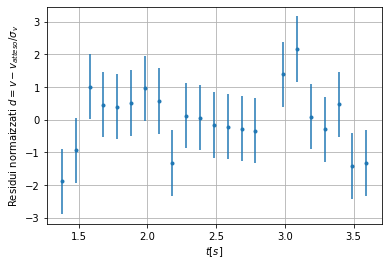

In [55]:
# Faccio le incertezze a posteriori per il fit di m2
v21_atteso = m21*t_nuovo21 + c21
dv21 = v21 - v21_atteso


sigmv21_post = np.sqrt( np.sum(dv21**2)/(dv21.size-2) )
uv21_post = np.repeat(sigmv21_post,v21.size)
print (sigmv21_post)

# Nuovo fit con incertezze a posteriori sulle y
m21, sm21, c21, sc21, cov21, rho21 = fra.lin_fit(t_nuovo21, v21, uv21_post, "t [s]", "y [uy]", ylabel1="v", verbose=True, plot=True, residui=True)

m         =  0.6143
sigma(m)  =  0.005
c         =  -0.1866
sigma(c)  =  0.0099
cov(m, c) =  -0.0
rho(m, c) =  -0.9589


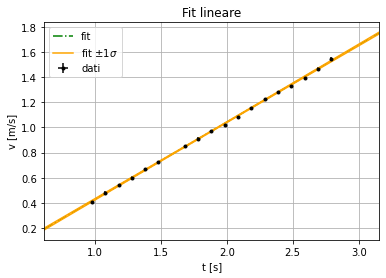

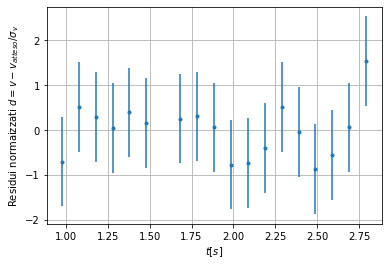

In [56]:

m31, sm31, c31, sc31, cov31, rho31 = fra.lin_fit(t_nuovo31, v31, uv31, xlabel="t [s]", ylabel="v [m/s]", ylabel1="v", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.6952
sigma(m)  =  0.0064
c         =  -0.0359
sigma(c)  =  0.0109
cov(m, c) =  -0.0001
rho(m, c) =  -0.9618


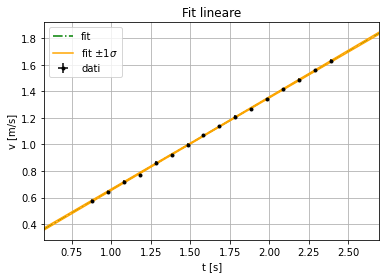

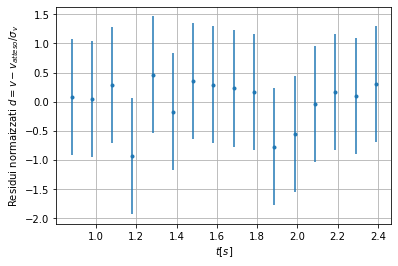

In [57]:

m41, sm41, c41, sc41, cov41, rho41 = fra.lin_fit(t_nuovo41, v41, uv41, xlabel="t [s]", ylabel="v [m/s]", ylabel1="v", uy_label="m/s", verbose=True, plot=True, residui=True)

# Angoli e g

In [ ]:
# provo a calcolare l'incertezza sugli angoli
sigmah = np.sqrt( np.power(0.001/np.sqrt(12),2)+np.power(0.002/np.sqrt(12),2)  )
sigmal = np.sqrt( np.power(0.001/np.sqrt(12),2)+np.power(0.01/np.sqrt(12),2)  )
Theta0 = (0.098-0.088)/1.41
uTheta0 = Theta0*np.sqrt( 2*np.power(sigmah/(0.098-0.088),2)+np.power(sigmal/1.41,2)  )

Theta1 = (0.118-0.088)/1.41
uTheta1 = Theta1*np.sqrt( 2*np.power(sigmah/(0.118-0.088),2)+np.power(sigmal/1.41,2)  )

Theta2 = (0.148-0.088)/1.41
uTheta2 = Theta2*np.sqrt( 2*np.power(sigmah/(0.148-0.088),2)+np.power(sigmal/1.41,2)  )

Theta3 = (0.178-0.088)/1.41
uTheta3 = Theta3*np.sqrt( 2*np.power(sigmah/(0.178-0.088),2)+np.power(sigmal/1.41,2)  )

Theta4 = (0.190-0.088)/1.41
uTheta4 = Theta4*np.sqrt( 2*np.power(sigmah/(0.190-0.088),2)+np.power(sigmal/1.41,2)  )
print(uTheta0,uTheta1,uTheta2,uTheta3,uTheta4)

0.0006475906236354078 0.0006489045854608274 0.0006533196967191568 0.0006606126459101549 0.0006643156464707123


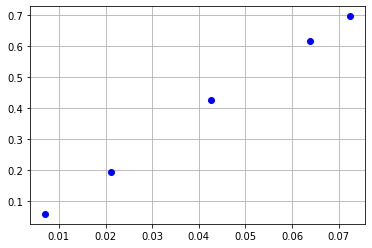

In [ ]:
acc = np.array([m01,m11,m21,m31,m41])
uacc = np.array([sm01,sm11,sm21,sm31,sm41])
Theta = np.array([Theta0,Theta1,Theta2,Theta3,Theta4])
uTheta = np.array([uTheta0,uTheta1,uTheta2,uTheta3,uTheta4])
plt.plot(Theta,acc,'bo')
plt.grid()

m         =  9.8259
sigma(m)  =  0.0635
c         =  -0.012
sigma(c)  =  0.0013
cov(m, c) =  -0.0001
rho(m, c) =  -0.6682


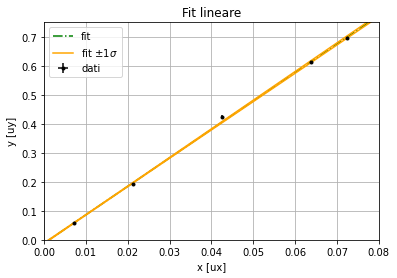

In [ ]:
# Eseguo il fit lineare, come nella scheda dell'esperienza uso M e C
M0, sM0, C0, sC0, covMC0, rhoMC0 = my.lin_fit(Theta, acc, uacc, "x [ux]", "y [uy]", 0, 0.08, 0, 0.75, plot=True, setrange=True)


m         =  9.8368
sigma(m)  =  0.1382
c         =  -0.0112
sigma(c)  =  0.0059
cov(m, c) =  -0.0007
rho(m, c) =  -0.8143


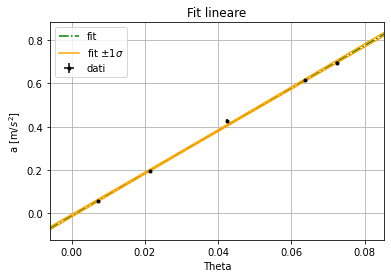

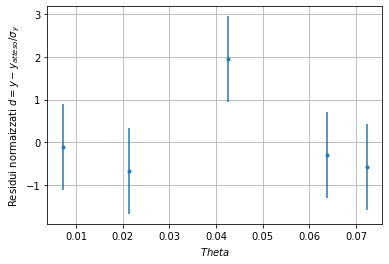

In [ ]:

uacc_new = np.sqrt(uacc**2+(M0*uTheta)**2)
M, sM, C, sC, covMC, rhoMC = fra.lin_fit(Theta, acc, uacc_new, xlabel="Theta", ylabel="a [m/$s^2$]", uy_label="m/s", verbose=True, plot=True, residui=True)

In [ ]:
mu = -C/M
sigmamu = mu*np.sqrt( np.power(sC/C,2)+np.power(sM/M,2)+2*rhoMC*(sM/M)*(sC/C)  )
print(mu,sigmamu) 

0.0011339470372063265 0.0006168873927757699


# Riproducibilità (carrello senza masse sopra)

##Importo i dati

In [ ]:
t02,dT02 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa0.2Nuovo.txt")

In [ ]:
t12,dT12 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa1.2.txt")

In [ ]:
t22,dT22 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa2.2.txt")

In [ ]:
t32,dT32 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa3.2.txt")

In [ ]:
t42,dT42 = fra.import_data2("/content/gdrive/My Drive/carrello/discesa4.2.txt")

##Conversione tempi in posizioni

In [ ]:
udT02=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT02)) 
x02, ux02 = fra.y_estrapolato2(dT02, m, c, udT02, sm, sc, cov)

In [ ]:
udT12=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT12)) 
x12, ux12 = fra.y_estrapolato2(dT12, m, c, udT12, sm, sc, cov)

In [ ]:
udT22=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT22)) 
x22, ux22 = fra.y_estrapolato2(dT22, m, c, udT22, sm, sc, cov)

In [ ]:
udT32=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT32)) 
x32, ux32 = fra.y_estrapolato2(dT32, m, c, udT32, sm, sc, cov)

In [ ]:
udT42=np.repeat(np.sqrt(np.power(0.000001/np.sqrt(12),2) + np.power(std_mean,2)),len(dT42)) 
x42, ux42 = fra.y_estrapolato2(dT42, m, c, udT42, sm, sc, cov)

##Grafici X(t)

Text(0.5, 1.0, '$\\theta_1$ = 0.00709')

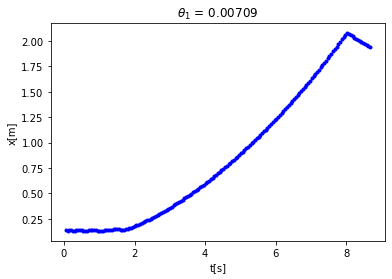

In [ ]:
plt.plot(t02,x02,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('$\\theta_1$ = 0.00709')

Text(0.5, 1.0, '$\\theta_2$ = 0.02128')

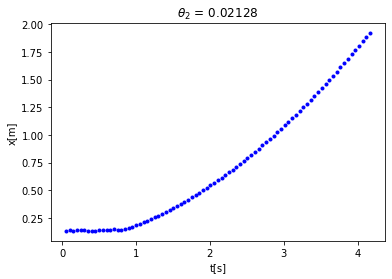

In [ ]:
plt.plot(t12,x12,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('$\\theta_2$ = 0.02128')

Text(0.5, 1.0, '$\\theta_3$ = 0.04255')

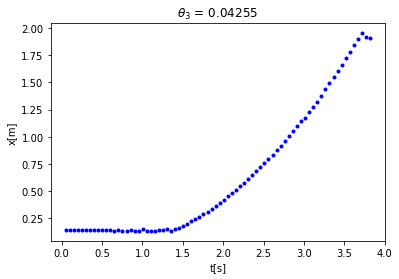

In [ ]:
plt.plot(t22,x22,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('$\\theta_3$ = 0.04255')

Text(0.5, 1.0, '$\\theta_4$ = 0.06383')

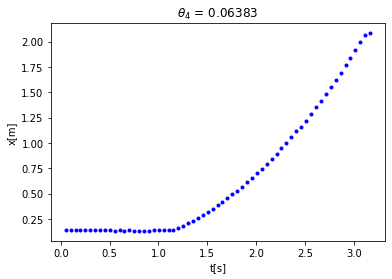

In [ ]:
plt.plot(t32,x32,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('$\\theta_4$ = 0.06383')

Text(0.5, 1.0, '$\\theta_5$ = 0.07234')

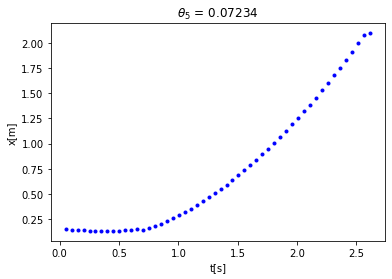

In [ ]:
plt.plot(t42,x42,'b.')
plt.xlabel('t[s]')
plt.ylabel('x[m]')
plt.title('$\\theta_5$ = 0.07234')

## Velocità - tagli e grafici

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


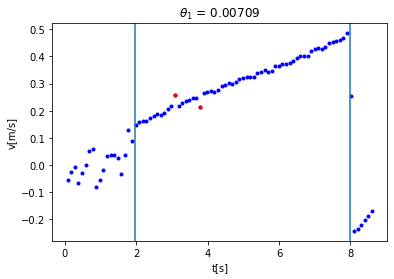

In [ ]:
v02,uv02=fra.velocita(x02, m, sm, udT02, dT02)
t_nuovo02 = fra.modifica_tempi(t02)
plt.plot(t_nuovo02,v02,'b.')
plt.axvline(x=1.95)
plt.axvline(x=8)

plt.plot(t_nuovo02[30],v02[30], '.r')
plt.plot(t_nuovo02[37],v02[37], '.r')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('$\\theta_1$ = 0.00709')

v02, uv02, t_nuovo02 = fra.dfCut (v02, uv02, t_nuovo02, 1.95, 8)
v02 = np.delete(v02,11)
uv02 = np.delete(uv02,11)
t_nuovo02 = np.delete(t_nuovo02,11)
v02 = np.delete(v02,17)
uv02 = np.delete(uv02,17)
t_nuovo02 = np.delete(t_nuovo02,17)


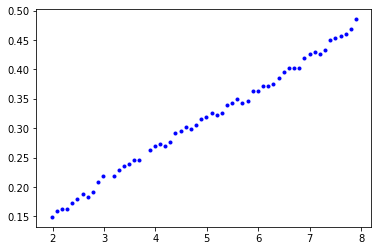

In [ ]:
plt.plot(t_nuovo02,v02,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


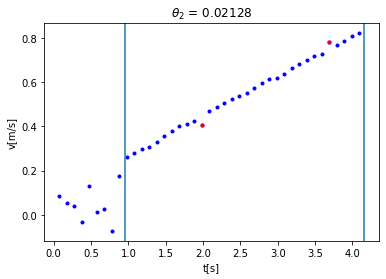

In [ ]:
v12,uv12=fra.velocita(x12, m, sm, udT12, dT12)
t_nuovo12 = fra.modifica_tempi(t12)
plt.plot(t_nuovo12,v12,'b.')
plt.axvline(x=0.95)
plt.axvline(x=4.15)

plt.plot(t_nuovo12[19],v12[19], '.r')
plt.plot(t_nuovo12[36],v12[36], '.r')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('$\\theta_2$ = 0.02128')

v12, uv12, t_nuovo12 = fra.dfCut (v12, uv12, t_nuovo12, 0.95, 4.15)
v12 = np.delete(v12,10)
uv12 = np.delete(uv12,10)
t_nuovo12 = np.delete(t_nuovo12,10)
v12 = np.delete(v12,26)
uv12 = np.delete(uv12,26)
t_nuovo12 = np.delete(t_nuovo12,26)

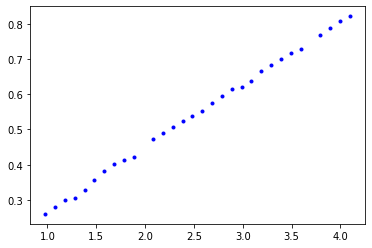

In [ ]:
plt.plot(t_nuovo12,v12,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


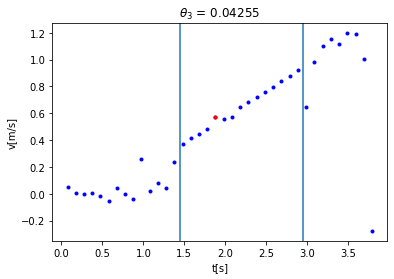

In [ ]:
v22,uv22=fra.velocita(x22, m, sm, udT22, dT22)
t_nuovo22 = fra.modifica_tempi(t22)
plt.plot(t_nuovo22,v22,'b.')
plt.axvline(x=1.45)
plt.axvline(x=2.95)

plt.plot(t_nuovo22[18],v22[18], '.r')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('$\\theta_3$ = 0.04255')

v22, uv22, t_nuovo22 = fra.dfCut (v22, uv22, t_nuovo22, 1.45, 2.95)
v22 = np.delete(v22,4)
uv22 = np.delete(uv22,4)
t_nuovo22 = np.delete(t_nuovo22,4)

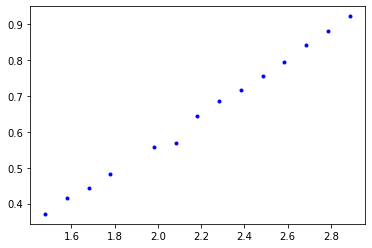

In [ ]:
plt.plot(t_nuovo22,v22,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


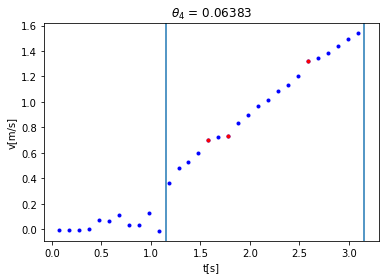

In [ ]:
v32,uv32=fra.velocita(x32, m, sm, udT32, dT32)
t_nuovo32 = fra.modifica_tempi(t32)
plt.plot(t_nuovo32,v32,'b.')
plt.axvline(x=1.15)
plt.axvline(x=3.15)

plt.plot(t_nuovo32[15],v32[15], '.r')
plt.plot(t_nuovo32[25],v32[25], '.r')
plt.plot(t_nuovo32[17],v32[17], '.r')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('$\\theta_4$ = 0.06383')

v32, uv32, t_nuovo32 = fra.dfCut (v32, uv32, t_nuovo32, 1.15, 3.15)
v32 = np.delete(v32,4)
uv32 = np.delete(uv32,4)
t_nuovo32 = np.delete(t_nuovo32,4)
v32 = np.delete(v32,5)
uv32 = np.delete(uv32,5)
t_nuovo32 = np.delete(t_nuovo32,5)
v32 = np.delete(v32,12)
uv32 = np.delete(uv32,12)
t_nuovo32 = np.delete(t_nuovo32,12)

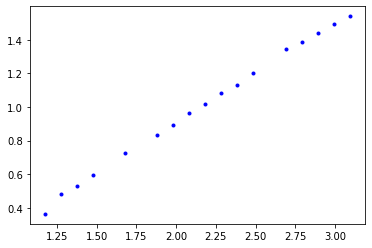

In [ ]:
plt.plot(t_nuovo32,v32,'b.')

/content/gdrive/My Drive/carrello/fra_libNuovo.py:48: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  df = df.drop(df[df.t < a].index | df[df.t > b].index)


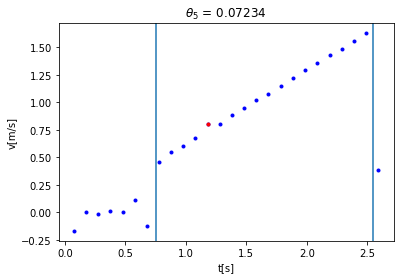

In [ ]:
v42,uv42=fra.velocita(x42, m, sm, udT42, dT42)
t_nuovo42 = fra.modifica_tempi(t42)
plt.plot(t_nuovo42,v42,'b.')
plt.axvline(x=0.75)
plt.axvline(x=2.55)

plt.plot(t_nuovo42[11],v42[11], '.r')
plt.xlabel('t[s]')
plt.ylabel('v[m/s]')
plt.title('$\\theta_5$ = 0.07234')

v42, uv42, t_nuovo42 = fra.dfCut (v42, uv42, t_nuovo42, 0.75, 2.55)
v42 = np.delete(v42,4)
uv42 = np.delete(uv42,4)
t_nuovo42 = np.delete(t_nuovo42,4)

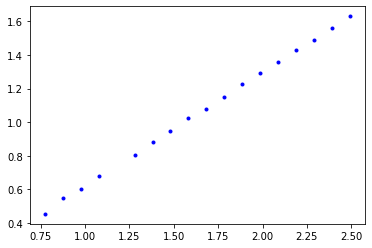

In [ ]:
plt.plot(t_nuovo42,v42,'b.')

## Fit sulle velocità

m         =  0.0534
sigma(m)  =  0.0009
c         =  0.0494
sigma(c)  =  0.0047
cov(m, c) =  -0.0
rho(m, c) =  -0.9441


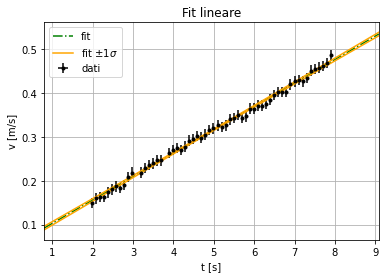

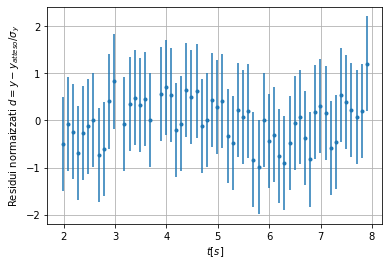

In [ ]:
m02, sm02, c02, sc02, cov02, rho02 = fra.lin_fit(t_nuovo02, v02, uv02, xlabel="t [s]", ylabel="v [m/s]", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.1799
sigma(m)  =  0.0023
c         =  0.0893
sigma(c)  =  0.0063
cov(m, c) =  -0.0
rho(m, c) =  -0.938


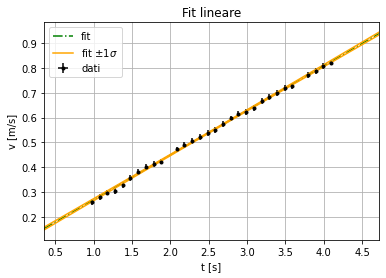

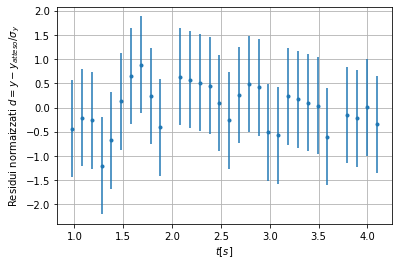

In [ ]:
m12, sm12, c12, sc12, cov12, rho12 = fra.lin_fit(t_nuovo12, v12, uv12, xlabel="t [s]", ylabel="v [m/s]", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.3916
sigma(m)  =  0.0072
c         =  -0.2142
sigma(c)  =  0.0162
cov(m, c) =  -0.0001
rho(m, c) =  -0.9805


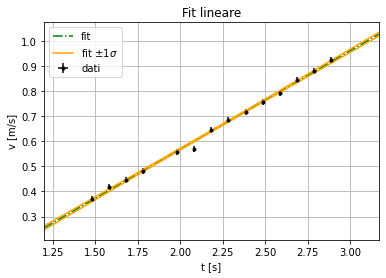

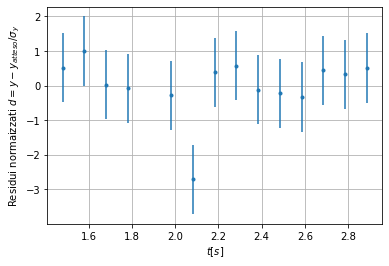

In [ ]:
m22, sm22, c22, sc22, cov22, rho22 = fra.lin_fit(t_nuovo22, v22, uv22, xlabel="t [s]", ylabel="v [m/s]", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.6043
sigma(m)  =  0.0048
c         =  -0.3045
sigma(c)  =  0.0108
cov(m, c) =  -0.0001
rho(m, c) =  -0.9636


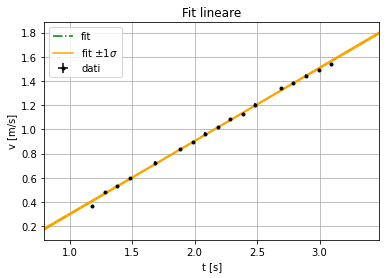

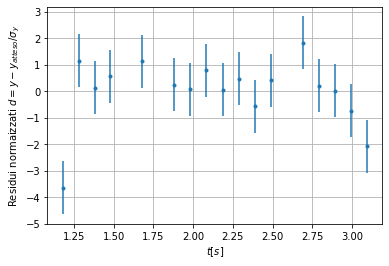

In [ ]:
m32, sm32, c32, sc32, cov32, rho32 = fra.lin_fit(t_nuovo32, v32, uv32, xlabel="t [s]", ylabel="v [m/s]", uy_label="m/s", verbose=True, plot=True, residui=True)

m         =  0.6775
sigma(m)  =  0.0055
c         =  -0.0569
sigma(c)  =  0.0096
cov(m, c) =  -0.0001
rho(m, c) =  -0.9532


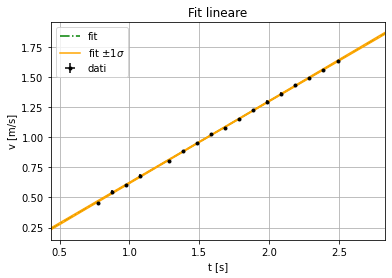

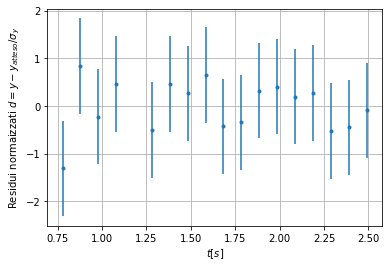

In [ ]:
m42, sm42, c42, sc42, cov42, rho42 = fra.lin_fit(t_nuovo42, v42, uv42, xlabel="t [s]", ylabel="v [m/s]", uy_label="m/s", verbose=True, plot=True, residui=True)

## Gravità e coeff. attr. (angoli uguali a prima)

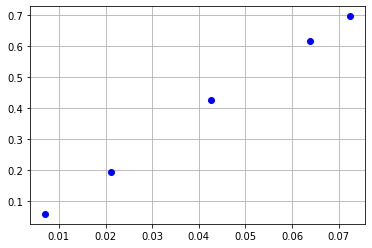

In [ ]:
acc2 = np.array([m02,m12,m22,m32,m42])
uacc2 = np.array([sm02,sm12,sm22,sm32,sm42])
Theta = np.array([Theta0,Theta1,Theta2,Theta3,Theta4])
uTheta = np.array([uTheta0,uTheta1,uTheta2,uTheta3,uTheta4])
plt.plot(Theta,acc,'bo')
plt.grid()

m         =  9.5741
sigma(m)  =  0.0579
c         =  -0.0155
sigma(c)  =  0.0011
cov(m, c) =  -0.0
rho(m, c) =  -0.6582


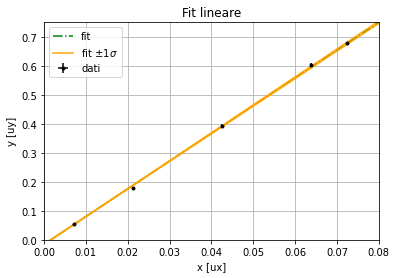

In [ ]:
# Eseguo il fit lineare, come nella scheda dell'esperienza uso M e C
M02, sM02, C02, sC02, covMC02, rhoMC02 = my.lin_fit(Theta, acc2, uacc2, "x [ux]", "y [uy]", 0, 0.08, 0, 0.75, plot=True, setrange=True)

m         =  9.6786
sigma(m)  =  0.1318
c         =  -0.0195
sigma(c)  =  0.0058
cov(m, c) =  -0.0006
rho(m, c) =  -0.8129


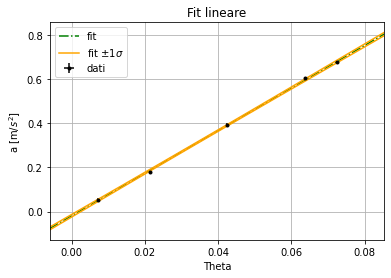

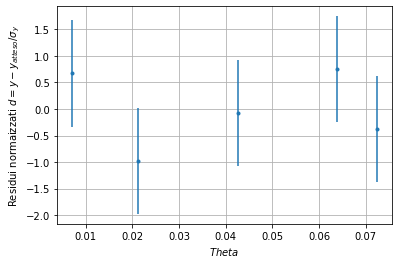

In [ ]:
uacc_new2 = np.sqrt(uacc2**2+(M02*uTheta)**2)
M2, sM2, C2, sC2, covMC2, rhoMC2 = fra.lin_fit(Theta, acc2, uacc_new2, xlabel="Theta", ylabel="a [m/$s^2$]", uy_label="m/s", verbose=True, plot=True, residui=True)

In [ ]:
mu2 = -C2/M2
sigmamu2 = mu2*np.sqrt( np.power(sC2/C2,2)+np.power(sM2/M2,2)+2*rhoMC2*(sM2/M2)*(sC2/C2)  )
print(mu2,sigmamu2) 

0.002013350207672205 0.000617048531007541


## Studio compatibilità 

In [ ]:
Zg = (M-M2)/np.sqrt(sM**2+sM2**2)
Zg

0.8281493566105202

In [ ]:
Zmu = (mu-mu2)/np.sqrt(sigmamu**2+sigmamu2**2)
Zmu

-1.007883680093561

# Riproducibilità (velocità iniziale)

## Importo i dati

In [ ]:
t03,dT03 = fra.import_data3("/content/gdrive/My Drive/carrello/discesa0.3Nuovo.txt")

AttributeError: ignored

In [ ]:
t13,dT13 = fra.import_data3("/content/gdrive/My Drive/carrello/discesa1.3.txt")

In [ ]:
t23,dT23 = fra.import_data3("/content/gdrive/My Drive/carrello/discesa2.3.txt")

In [ ]:
t33,dT33 = fra.import_data3("/content/gdrive/My Drive/carrello/discesa3.3.txt")

In [ ]:
t43,dT43 = fra.import_data3("/content/gdrive/My Drive/carrello/discesa4.3.txt")